In [1]:
# written using google colaboratory (Python3 kernel)
import math
import numpy as np

In [2]:
#finding the coordinates of the ends of panels
n = 100
theta = []
x_end = []
y_end = []
for k in range(n):
  theta.append(2*(k+1)*math.pi/float(n)- math.pi/float(n))
  x_end.append(round(math.cos(2*(k+1)*math.pi/float(n) - math.pi/float(n)), 3))
  y_end.append(round(math.sin(2*(k+1)*math.pi/float(n) - math.pi/float(n)), 3))

In [3]:
#length of each panel
Sj = 2*math.sin(math.pi/n)

In [4]:
# theta of control points
theta_cp = 0.5*np.array(theta[1:] + [2*math.pi + theta[0]]) + 0.5*np.array(theta)

In [5]:
#control points
x_cp = (np.array(x_end[:-1]) + np.array(x_end[1:]))/2
x_cp = np.append(x_cp, (x_end[n-1] + x_end[0])/2)
y_cp = (np.array(y_end[:-1]) + np.array(y_end[1:]))/2
y_cp = np.append(y_cp, (y_end[n-1] + y_end[0])/2)

In [6]:
v_inf_x = 1 #taking v_inf as unity along the x direction
v_inf_y = 0

In [7]:
#finding unit normal to each panel
sn = np.zeros(n)
delta_x = np.array(x_end[:-1]) - np.array(x_end[1:])
delta_x = np.append(delta_x, x_end[n-1] - x_end[0])
delta_y = np.array(y_end[1:]) - np.array(y_end[:-1])
delta_y = np.append(delta_y, y_end[0] - y_end[n-1])
for k in range(n):
  if (delta_y[k] == 0):
    sn[k] = math.inf
  else:
    sn[k] = delta_x[k]/delta_y[k]  
nx = np.zeros(n) #x comp of normal vector
ny = np.zeros(n) #y comp of normal vector
for i in range(n):
  if (x_cp[i] == 0):
    ny[i] = y_cp[i]/abs(y_cp[i])
  elif (y_cp[i] == 0):
    nx[i] = x_cp[i]/abs(x_cp[i])  
  else:
    ny[i] = round(abs(math.sin(math.atan(sn[i])))*y_cp[i]/abs(y_cp[i]), 3)
    nx[i] = round(abs(math.cos(math.atan(sn[i])))*x_cp[i]/abs(x_cp[i]), 3)

In [8]:
v_inf_n = v_inf_x*nx #normal component of freestream velocity

In [9]:
import sympy as sym

In [10]:
a = np.zeros((n,n))
x_end_plus = x_end[1:] + [x_end[0]]
y_end_plus = y_end[1:] + [y_end[0]]

In [11]:
# finding Iij
for i in range(n):
  for j in range(n):
    if (i!=j):
      Yj = y_end_plus[j]
      Xj = x_end_plus[j]  
      A = -(x_cp[i] - Xj)*ny[j] + (y_cp[i] - Yj)*nx[j]
      B = (x_cp[i] - Xj)**2 + (y_cp[i] - Yj)**2
      C = -nx[i]*ny[j] + ny[i]*nx[j]
      D = (y_cp[i] - Yj)*ny[i] + (x_cp[i] - Xj)*nx[i]
      E = -(x_cp[i] - Xj)*nx[j] - (y_cp[i] - Yj)*ny[j]
      Iij = 0.5*C*math.log((Sj**2 + 2*A*Sj + B)/B) + (D - A*C)*(math.atan((Sj + A)/E) - math.atan(A/E))/E
      a[i][j] = Iij/(2*math.pi)
    else:
      a[i][j] = 0.5  

In [12]:
# solving the simultaneous linear equation system by matrix method
strength = np.linalg.inv(np.array(a))@np.array(-v_inf_n) #X = A^-1*B
#rounding off
for i in range(n):
  strength[i] = round(strength[i], 3)
  if (n<=10):
    print("THE STRENGTH/LENGTH OF SOURCE ", i+1, " is: ", strength[i], " m^2/s^2.")

In [13]:
# verification of sum of source strengths going to zero
print(round(np.sum(strength), 3))

-0.0


In [14]:
v_inf_t = v_inf_x*ny #tangential component of freestream velocity

In [15]:
# finding tangential velocity at each control point
v_t = np.zeros(n)
for i in range(n):
  sum = 0
  for j in range(n):
    if (i!=j):
      Yj = y_end_plus[j]
      Xj = x_end_plus[j]  
      A = -(x_cp[i] - Xj)*ny[j] + (y_cp[i] - Yj)*nx[j]
      B = (x_cp[i] - Xj)**2 + (y_cp[i] - Yj)**2
      C = -nx[i]*ny[j] + ny[i]*nx[j]
      D = (y_cp[i] - Yj)*ny[i] + (x_cp[i] - Xj)*nx[i]
      E = -(x_cp[i] - Xj)*nx[j] - (y_cp[i] - Yj)*ny[j]
      Iij = 0.5*(D - A*C)*math.log((Sj**2 + 2*A*Sj + B)/B)/E - C*(math.atan((Sj + A)/E) - math.atan(A/E))
      sum += strength[j]*Iij/(2*math.pi)   
  v_t[i] = sum + v_inf_t[i]     

In [16]:
# calculating cp at each control point
cp = np.zeros(n)
for k in range(n):
  cp[k] = 1 - v_t[k]**2/(v_inf_x**2 + v_inf_y**2)  

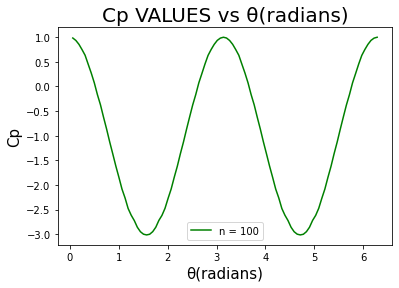

In [17]:
# plotting the cp vs theta plot
import matplotlib.pyplot as plt
plt.plot(theta_cp, cp, color = "green")
plt.title("Cp VALUES vs θ(radians)", fontsize = 20)
plt.xlabel("θ(radians)", fontsize = 15)
plt.ylabel("Cp", fontsize = 15)
plt.legend(["n = 100"], loc = "lower center")